In [3]:
import tensorflow as tf
import zipfile
import os 
import random
import csv
import math
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
#extracting data from zip
try:
    local_zip = './data/archive_data/new_dataset.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./data/data_2')
    zip_ref.close()
#if data is already extracted it will instead print file already extracted
except:
    print('file already extracted')

In [13]:
root = './data/data_2/ISIC_Labelled'
file = []
for files in os.walk(root, topdown=True):
    file.append(files)
    
ffile = file[1:]
file = []
counter = 0
for x in ffile:
    counter += len(x[2])

print(f"there is {counter} data in data_2")
tumor_2 = len(os.listdir(root))
print(f"with {tumor_2} classifications")

there is 25331 data in data_2
with 8 classifications


In [14]:
dir_2 = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
root_dir = "./data/final_dataset"
def create_dir(root_path):
    if os.path.exists(root_dir):
        shutil.rmtree(root_dir)

    os.makedirs(os.path.join(root_path, 'training'))
    os.makedirs(os.path.join(root_path, 'validation'))

    for i in dir_2:
        os.makedirs(os.path.join(f'{root_path}/training', i))
        os.makedirs(os.path.join(f'{root_path}/validation', i))
            
create_dir(root_path=root_dir)

In [15]:
path = './data/data_2/ISIC_Labelled'

dir_new = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
dir_old = ['Melanoma', 'Melanocytic nevus', 'Basal cell carcinoma', 'Actinic keratosis', 'Benign keratosis', 'Dermatofibroma', 'Vascular lesion', 'Squamous cell carcinoma']

counter = 0

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    name = os.path.splitext(filename)
    
    for i, x in enumerate(dir_old):
        if x in name:
            postfix = dir_new[i]
            new_name = os.path.join(path, postfix)
            os.rename(file_path, new_name)
            continue
    counter += 1

In [16]:
counter = 0

for file in (dir_2):
    dir = os.listdir(f"{path}/{file}")
    random.shuffle(dir)
    
    training = dir[:200]
    val = dir[200:239]
    print(f"Training data for {file} is {len(training)}")
    print(f"Validation data for {file} is {len(val)}\n")
    
    root = './data/data_2/ISIC_Labelled/'
    root_dest = './data/final_dataset'
    for i in training:
        source_img = os.path.join(f"{root}/{dir_2[counter]}", i)
        destination = os.path.join(f"{root_dest}/training/{dir_2[counter]}", i)
        copyfile(source_img, destination)
    
    for i in val:
        source_img = os.path.join(f"{root}/{dir_2[counter]}", i)
        destination = os.path.join(f"{root_dest}/validation/{dir_2[counter]}", i)
        copyfile(source_img, destination)
        
    counter+=1

Training data for melanoma is 200
Validation data for melanoma is 39

Training data for melanocytic_nevi is 200
Validation data for melanocytic_nevi is 39

Training data for basal_cell_carcinoma is 200
Validation data for basal_cell_carcinoma is 39

Training data for bowen_disease is 200
Validation data for bowen_disease is 39

Training data for benign_keratosis is 200
Validation data for benign_keratosis is 39

Training data for dermatofibroma is 200
Validation data for dermatofibroma is 39

Training data for vascular_lesions is 200
Validation data for vascular_lesions is 39

Training data for squamous_cell_carcinoma is 200
Validation data for squamous_cell_carcinoma is 39



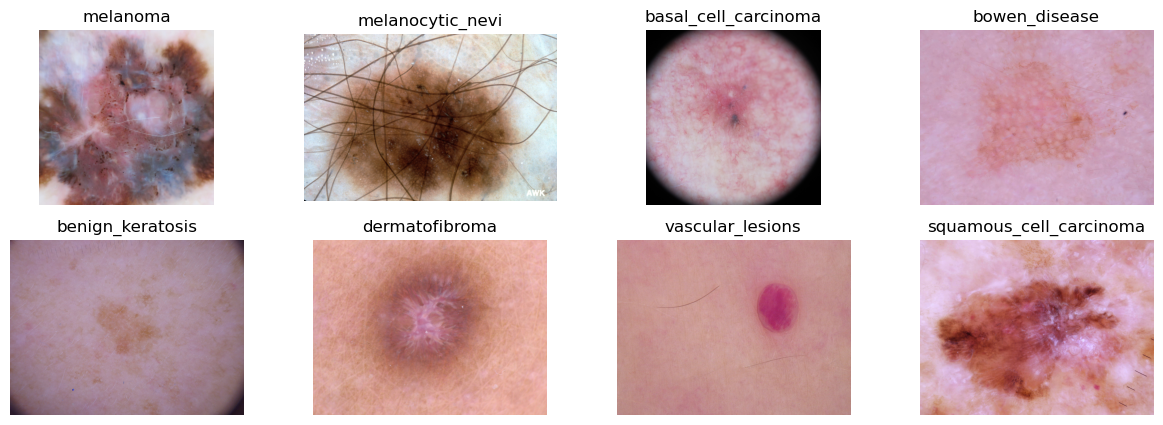

In [17]:
#show image example
root_path = './data/final_dataset/training/'
fig, axes = plt.subplots(2, 4, figsize=(15,5))
counter = 0
for i in range(2):
    for j in range(4):
        ax = axes[i][j]
        ax.set_title(dir_new[counter])
        ax.imshow(load_img(f"{os.path.join(f'{root_path}/{dir_new[counter]}', os.listdir(f'{root_path+dir_new[counter]}')[random.randint(0,100)])}"))
        ax.set_axis_off()
        plt.show
        counter += 1

In [18]:
training_main = './data/final_dataset/training'
validation_main = './data/final_dataset/validation'

In [19]:
training_paths = []
val_paths = []
for class_name in dir_new:
    training_path = os.path.join(training_main, class_name)
    val_path = os.path.join(validation_main, class_name)
    training_paths.append(training_path)
    val_paths.append(val_path)

In [20]:
for i, class_path in enumerate (training_paths):
    print(class_path)
print('\n')
for i, class_path in enumerate (val_paths):
    print(class_path)

./data/final_dataset/training\melanoma
./data/final_dataset/training\melanocytic_nevi
./data/final_dataset/training\basal_cell_carcinoma
./data/final_dataset/training\bowen_disease
./data/final_dataset/training\benign_keratosis
./data/final_dataset/training\dermatofibroma
./data/final_dataset/training\vascular_lesions
./data/final_dataset/training\squamous_cell_carcinoma


./data/final_dataset/validation\melanoma
./data/final_dataset/validation\melanocytic_nevi
./data/final_dataset/validation\basal_cell_carcinoma
./data/final_dataset/validation\bowen_disease
./data/final_dataset/validation\benign_keratosis
./data/final_dataset/validation\dermatofibroma
./data/final_dataset/validation\vascular_lesions
./data/final_dataset/validation\squamous_cell_carcinoma


In [43]:
def train_val_generators(training_main, validation_main):
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = train_datagen.flow_from_directory(
        directory=training_main,
        target_size=(224,224),
        batch_size=64,
        class_mode='categorical'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255.)
    validation_generator = validation_datagen.flow_from_directory(
        directory=validation_main,
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, validation_generator

In [44]:
train_generator, validation_generator = train_val_generators(training_main, validation_main)

Found 1600 images belonging to 8 classes.
Found 312 images belonging to 8 classes.


In [103]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, verbose=1, min_lr=1e-6)

In [104]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(224,224,3))
base_model.trainable=False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [105]:
tf.random.set_seed(33)
    
model = tf.keras.models.Sequential([
base_model,
tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
          loss = 'categorical_crossentropy',
          metrics=['accuracy'])       

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_15  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_40 (Dense)            (None, 8)                 10248     
                                                                 
Total params: 2,268,232
Trainable params: 10,248
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Save your model
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train your model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    validation_steps=int(0.15*len(validation_generator)),
                    callbacks=[reduce_lr])

Epoch 1/50
25/25 [==============================] - 60s 2s/step - loss: 2.0736 - accuracy: 0.2219 - val_loss: 2.1700 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - 56s 2s/step - loss: 1.7094 - accuracy: 0.3700 - val_loss: 1.9677 - val_accuracy: 0.1562 - lr: 0.0010
Epoch 3/50
25/25 [==============================] - 55s 2s/step - loss: 1.6062 - accuracy: 0.4031 - val_loss: 1.4710 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
25/25 [==============================] - 55s 2s/step - loss: 1.5199 - accuracy: 0.4356 - val_loss: 1.5453 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 5/50
25/25 [==============================] - 55s 2s/step - loss: 1.4904 - accuracy: 0.4512 - val_loss: 1.4123 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 6/50
25/25 [==============================] - 56s 2s/step - loss: 1.4278 - accuracy: 0.4900 - val_loss: 1.7942 - val_accuracy: 0.3438 - lr: 0.0010
Epoch 7/50
25/25 [==============================] - 55s 2s/step - loss: 1.3801 - a